In [1]:
import sys
sys.path.append('/home/michaelwilliams/git_repos/Accelerating-GWPE/nn/')
print(sys.path[-1])

/home/michaelwilliams/git_repos/Accelerating-GWPE/nn/


In [2]:
import numpy as np
from gwfa.utils.plotting import read_results

/home/michaelwilliams/.miniconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/michaelwilliams/.miniconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/michaelwilliams/.miniconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/michaelwilliams/.mi

Setting up Keras to use GPU with miminal memory on 0




In [3]:
x = {"luminosity_distance": 2000., "theta_jn": 0., "mass_1": 30., "mass_2": 50.}
y = [x[a] for a in x.keys()]
z = np.sum(y)
z

2080.0

In [18]:
d = read_results("./mount_dir/4_params_m1_m2_ld_theta_jn/run0/", "results.h5", concat=True)

In [19]:
print(d.keys())

odict_keys(['JSD', 'KL', 'loss', 'parameters', 'val_JSD', 'val_KL', 'val_loss', 'x_train', 'x_val', 'y_pred', 'y_train', 'y_train_pred', 'y_val'])


In [20]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(2, 1, figsize=[12,12], sharex = True)
ax = ax.ravel()
n = len(d["val_loss"])
colors = plt.cm.tab20(np.linspace(0,1,n))
for i in range(n):
    ax[0].plot(d["val_loss"][i], label = f"Block {i+1}", c=colors[i])
    if i >= 7:
        ax[1].plot(d["val_loss"][i], label = f"Run {i+1}", c=colors[i])
ax[0].set_ylabel("MSE")
ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Epochs")
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
#fig.savefig("plots/loss_multiple_blocks.png")
plt.show()

In [41]:
from scipy.special import logsumexp
def elu(x, alpha=0.01):
    y = x.copy()
    neg_indices = np.where(x <= 0.)
    y[neg_indices] = alpha * (np.exp(y[neg_indices]) - 1.)
    return y
def ielu(x, alpha=0.01):
    y = x.copy()
    neg_indices = np.where(x <= 0.)
    print(np.shape(neg_indices))
    y[neg_indices] = np.log(y[neg_indices] / alpha + 1.)
    return y

In [22]:
from scipy.special import logit, expit

137.71406868485457 -71115.37717871944 71468


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 6.0000e+00, 7.1459e+04]),
 array([-71115.37717872, -63990.06805398, -56864.75892924, -49739.4498045 ,
        -42614.14067976, -35488.83155502, -28363.52243028, -21238.21330554,
        -14112.9041808 ,  -6987.59505606,    137.71406868]),
 <a list of 10 Patch objects>)

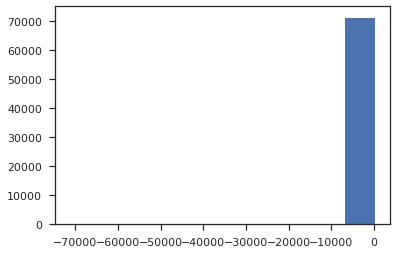

In [28]:
L = d["y_train"]
print(L.max(), L.min(), len(L))
fig = plt.figure()
plt.hist(L)

-0.9 137.71406868485457


Text(0.5, 0, 'elu(logL)')

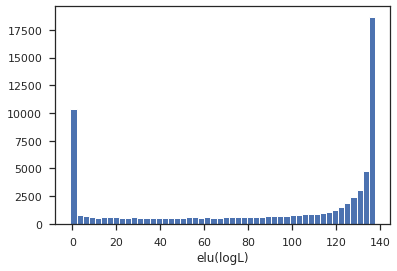

In [42]:
y = elu(d["y_train"], alpha=0.9)
print(y.min(), y.max())
fig = plt.figure()
plt.hist(y, bins=50)
#plt.plot(y, '.')
plt.xlabel("elu(logL)")
#fig.savefig("./plots/expit.png")

(668800,)
(1, 110239)


/home/michaelwilliams/.miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/michaelwilliams/.miniconda3/envs/tf/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/michaelwilliams/.miniconda3/envs/tf/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'ielu(logL)')

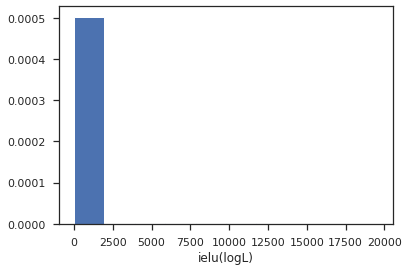

In [11]:
fig = plt.figure()
print(np.shape(y))
plt.hist(ielu(y), bins=10, density=True)
plt.xlabel("ielu(logL)")

In [12]:
a = 2
b = 1
if a is None and b is None:
    print("default")
elif a is None or b is None:
    print("error")
else:
    print("use")

use


In [13]:
from gwfa.function_approximator import FunctionApproximator

In [14]:
FA = FunctionApproximator(attr_dict="./mount_dir/4_params_m1_m2_ld_theta_jn/run1/fa.pkl", verbose=0)
FA.load_weights("./mount_dir/4_params_m1_m2_ld_theta_jn/run1/block18/model_weights.h5")

Proceeding with no regularization



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
p0_dense_0 (Dense)           (None, 2048)              10240     
_________________________________________________________________
p0_dense_1 (Dense)           (None, 2048)              4196352   
_________________________________________________________________
p0_dense_2 (Dense)           (None, 2048)              4196352   
_________________________________________________________________
p0_dense_3 (Dense)           (None, 2048)              4196352   
_________________________________________________________________
output_dense (Dense)         (None, 1)                 2049      
Total params: 12,601,345
Trainable params: 12,601,345
Non-trainable params: 0
___________________________

In [15]:
x = d["x_val"]*(FA._prior_max - FA._prior_min) + FA._prior_min
print(x)

[[3.25785559e+03 2.33037861e+00 8.44210016e+01 1.08223287e+01]
 [3.02847364e+03 1.15607288e+00 6.95084528e+01 3.27167154e+01]
 [3.45946393e+03 9.00705996e-01 3.50286490e+01 1.00444096e+01]
 ...
 [4.47393719e+03 1.81961079e+00 4.52229040e+01 2.64287544e+01]
 [1.44049367e+03 8.23981058e-01 3.58801505e+01 2.90364041e+01]
 [1.79785875e+03 1.45133267e+00 4.97405078e+01 1.34785464e+01]]


In [16]:
FA.predict(x[:100])[-1]

array([-13.87205315, -16.50964355, -10.91115952,  -8.31090164,
        -3.99357843,  -7.7340765 ,  -4.43641567, -18.06742859,
       -16.3566246 ,  -9.3070755 ,  -8.59885025, -15.84571075,
        -6.05120087, -15.96609783,  -3.92420554,   3.85339427,
       -16.84449959,  -4.53033161,  -6.87023735,  -8.69444847,
       -18.11943436,  -7.55803871,  -7.22141361, -10.07719994,
        -6.3930912 ,  -8.29854202,  -7.51918888, -12.66310501,
        -7.05444145, -10.47530174, -10.3976059 ,  -9.06276512,
       -11.11466026, -14.70831299,  -5.92405558,  -7.26188755,
        -9.3502903 , -11.29143143,  -7.09145546,  -7.90888643,
       -16.90991974,  -7.37544727,  -9.78392792, -13.57169342,
       -17.40574265,  -8.9812355 , -13.63132191, -17.54860115,
       -13.70261955, -16.1267395 ,  -6.11330891, -10.8710556 ,
        -9.18021584,  -6.92271614, -10.329422  ,  -6.83127499,
       -10.26504517, -18.54631424, -11.34042931, -15.04005527,
       -15.24161911,  -5.90678453, -13.17948151, -15.25

In [17]:
FA.parameter_names

['luminosity_distance', 'theta_jn', 'mass_1', 'mass_2']